# Walmart Sales and Demand Prediction: An End-to-End Analysis
## Introduction

#### In this notebook, we aim to tackle the challenge of predicting sales and demand for Walmart stores across the United States. Accurate sales forecasting is critical for optimizing inventory management, improving customer satisfaction, and driving overall business efficiency. This project leverages historical sales data, including features such as holidays, temperature, fuel prices, and economic indicators, to build predictive models that can forecast future sales.

### 1. Understand the Dataset:
* Explore the provided dataset to gain insights into its structure and contents.
* Perform data cleaning and preprocessing to handle any missing values or anomalies.

### 2. Exploratory Data Analysis (EDA):
* Visualize the distribution of sales and other features.
* Analyze correlations and trends to understand how various factors impact sales.

### 3. Feature Engineering:
* Create new features that might enhance model performance if applicable.
* Encode categorical variables and scale numerical features.

### 4. Model Training and Testing:
* Split the dataset into training and test sets.
* Train multiple regression models, including Linear Regression, Random Forest, Support Vector Regressor, Decision Tree Regressor, and Neural Network.
* Evaluate the models using metrics such as RMSE (Root Mean Squared Error) and R^2 (Coefficient of Determination).

### 5. Model Evaluation and Selection:
* Compare model performances to identify the best-performing model.
* Save the best model for future predictions and deployment.

### 6. Conclusion
* Summarize the process
* Discuss findings and how it could achieve a business goal

In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import joblib
from scipy import stats

In [52]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [53]:
# Get file path
import os
for dirname, _, filenames in os.walk('/Users/sophia/Desktop/Sales-Prediction/data/raw/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/sophia/Desktop/Sales-Prediction/data/raw/Walmart.csv


In [54]:
# Load file path and read it as a pandas dataframe
file_path = '/Users/sophia/Desktop/Sales-Prediction/data/raw/Walmart.csv'
df = pd.read_csv(file_path, parse_dates=['Date'])

# 1.) Understand the Dataset

In [7]:
# Display the first few rows of the dataset
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [43]:
# Display basic info and stats
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [55]:
# Check for duplicates
df.duplicated().sum()

0

In [56]:
# Check for missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# 2.) Exploratory Data Analysis (EDA)

## Understand the Data Distribution

Visualize the distribution of key numerical features to understand their ranges and distributions.

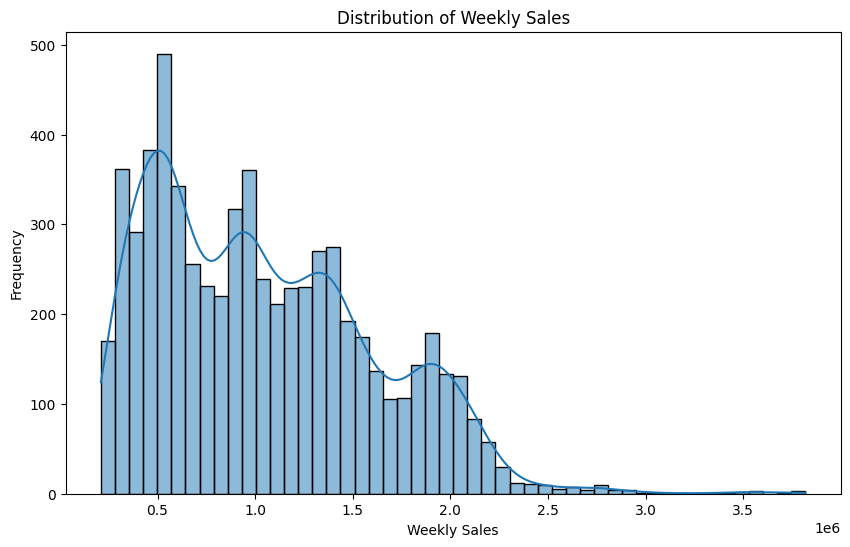

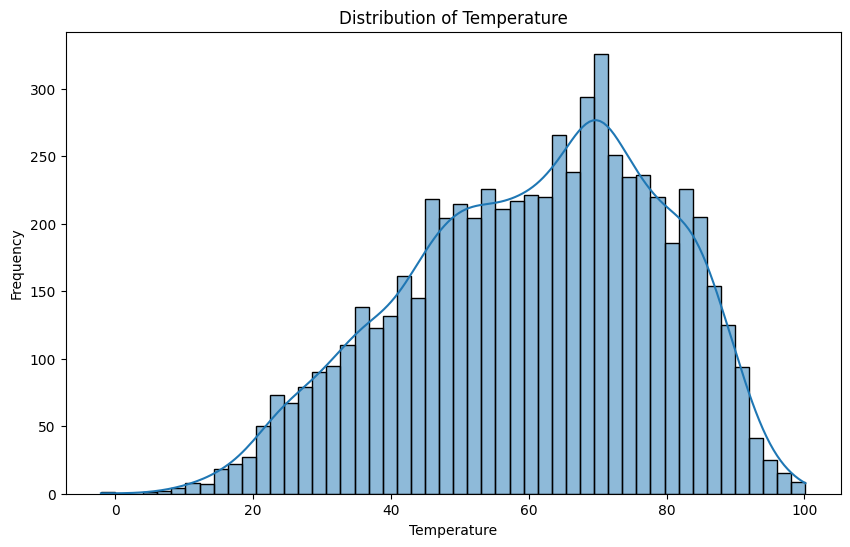

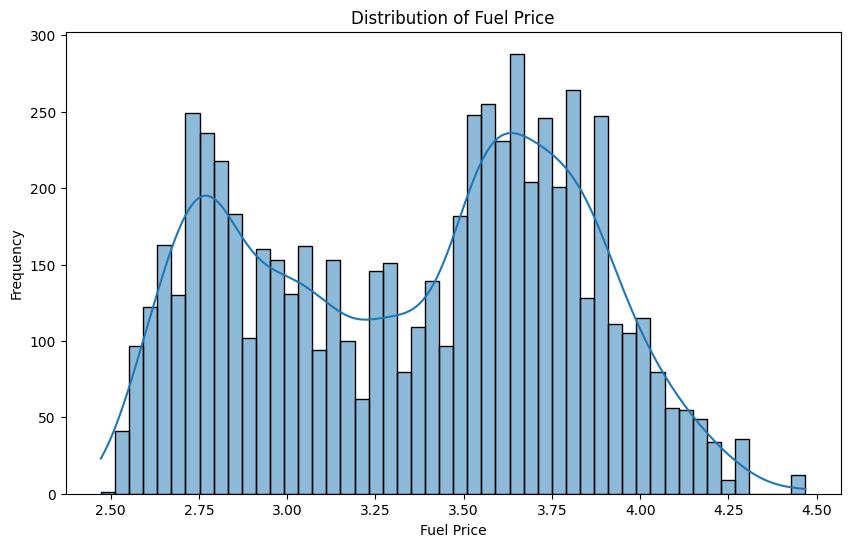

In [46]:
# Distribution of Weekly Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

# Distribution of Temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature'], bins=50, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Distribution of Fuel Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Fuel_Price'], bins=50, kde=True)
plt.title('Distribution of Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Frequency')
plt.show()

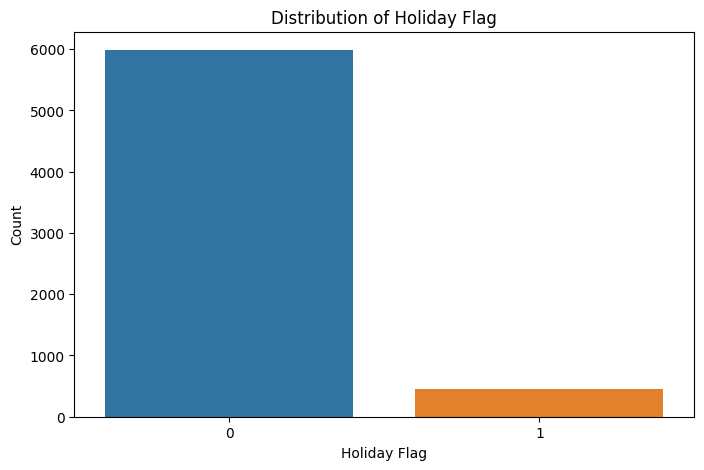

In [47]:
# Distribution of Holiday Flag
plt.figure(figsize=(8, 5))
sns.countplot(x='Holiday_Flag', data=df)
plt.title('Distribution of Holiday Flag')
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.show()

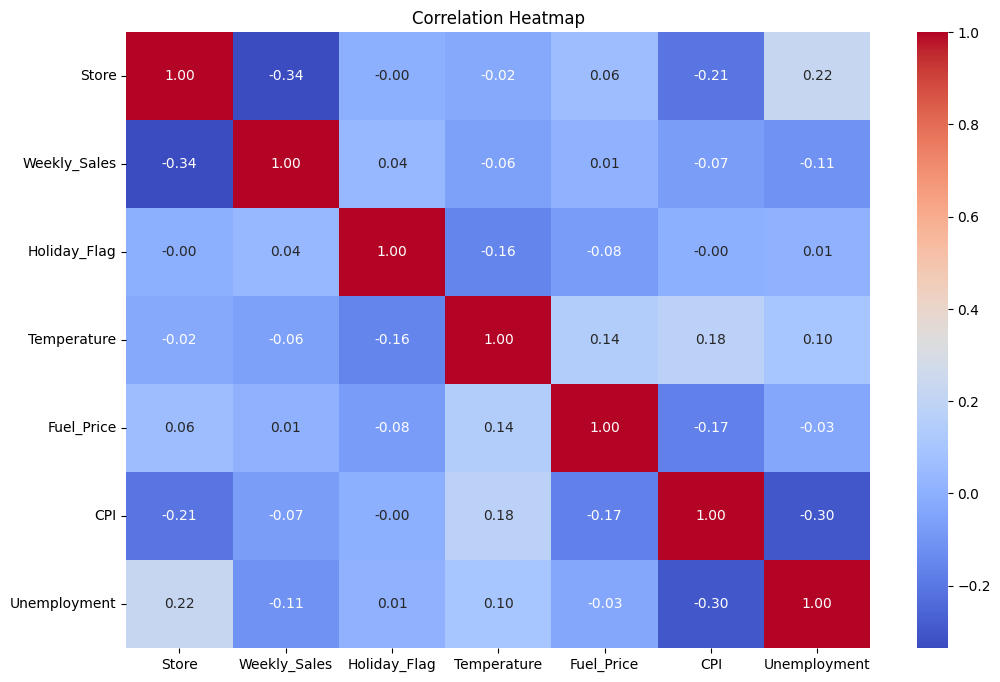

In [48]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

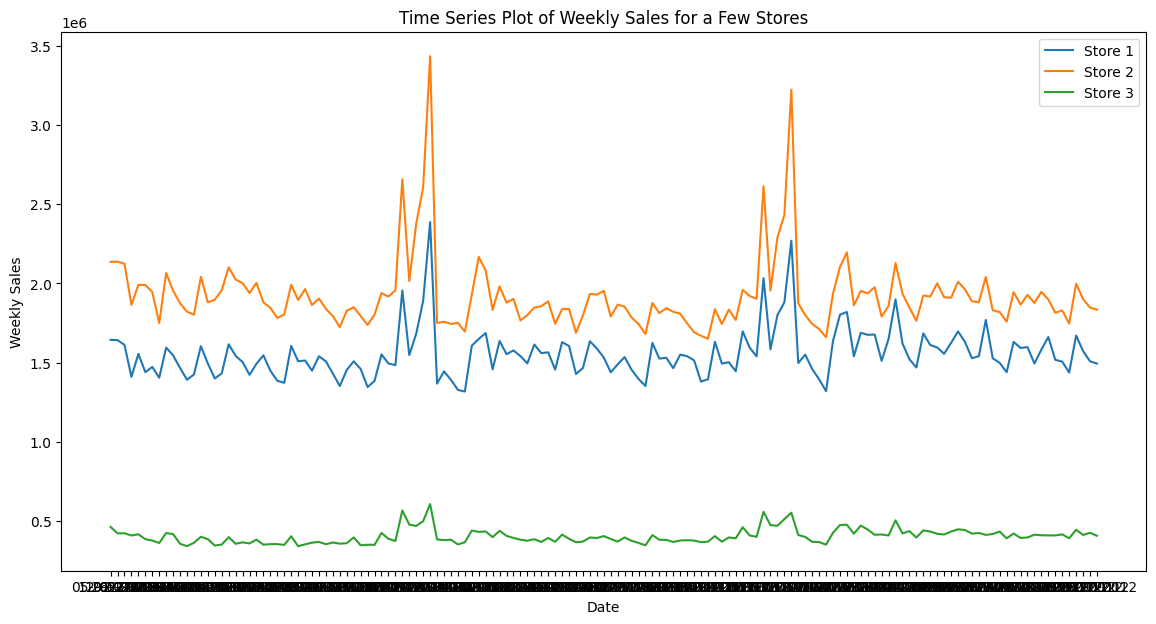

In [49]:
# Time series plot for a few stores
plt.figure(figsize=(14, 7))
for store in df['Store'].unique()[:3]:  # Plot for first 3 stores
    store_data = df[df['Store'] == store]
    plt.plot(store_data['Date'], store_data['Weekly_Sales'], label=f'Store {store}')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Time Series Plot of Weekly Sales for a Few Stores')
plt.legend()
plt.show()

## Analyze Date Range

Check the range of dates in the dataset to understand the time period covered.

In [32]:
# Check date range
df['Date'].min(), df['Date'].max()

('01-04-2011', '31-12-2010')

## Examine Seasonal Effects

Check how sales vary across different months or seasons.

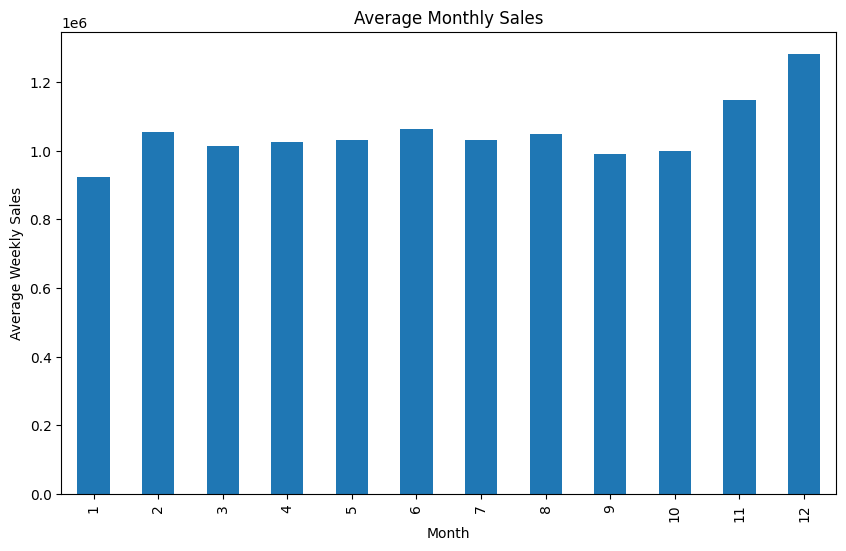

In [8]:
# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Add a month column to the DataFrame
df['Month'] = df['Date'].dt.month

# Monthly average sales
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

# Plot monthly average sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

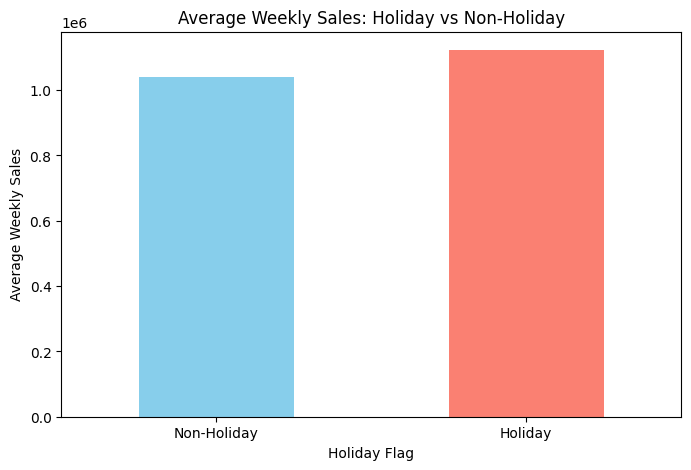

In [52]:
# Average sales with respect to Holiday Flag
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

# Plot average sales based on holiday flag
plt.figure(figsize=(8, 5))
holiday_sales.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

## Analyze Relationship with Weather and Economic Indicators

Explore how Temperature, Fuel_Price, CPI, and Unemployment impact Weekly_Sales.

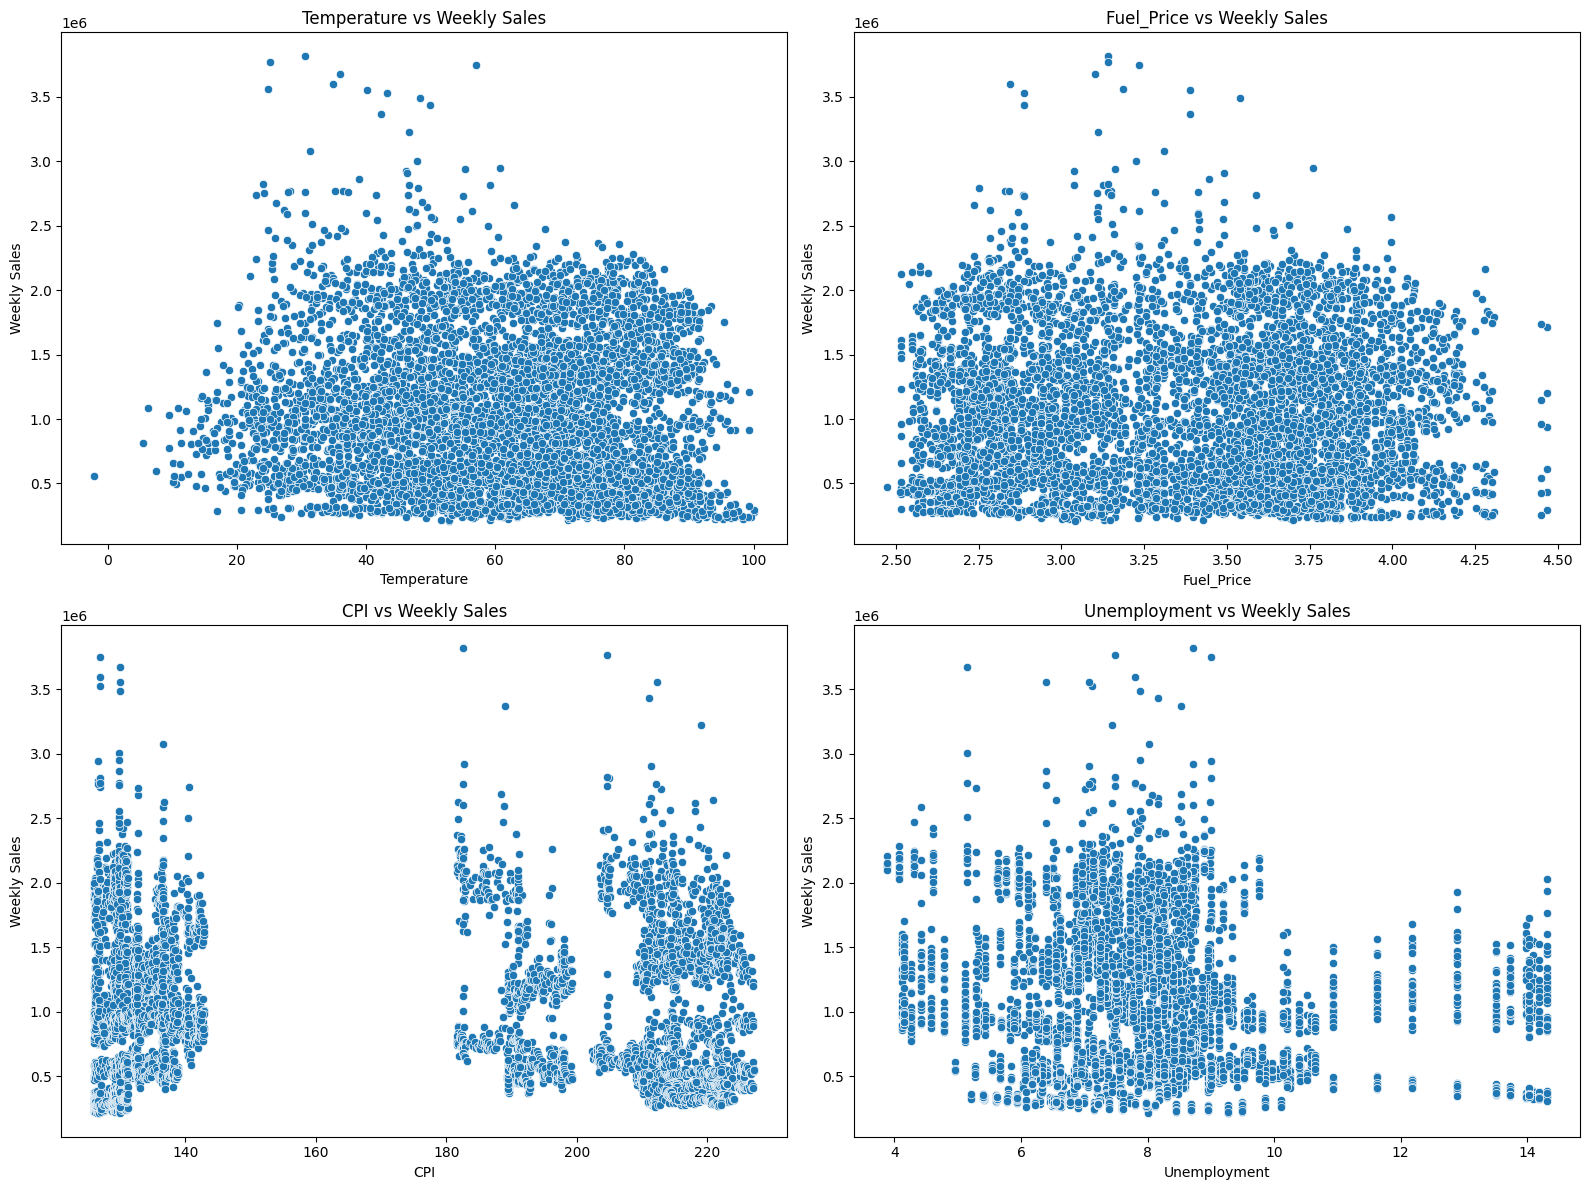

In [53]:
# Scatter plots for numerical features vs. Weekly Sales
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[feature], y=df['Weekly_Sales'])
    plt.title(f'{feature} vs Weekly Sales')
    plt.xlabel(feature)
    plt.ylabel('Weekly Sales')

plt.tight_layout()
plt.show()

## Store-Level Analysis

Compare sales across different stores.

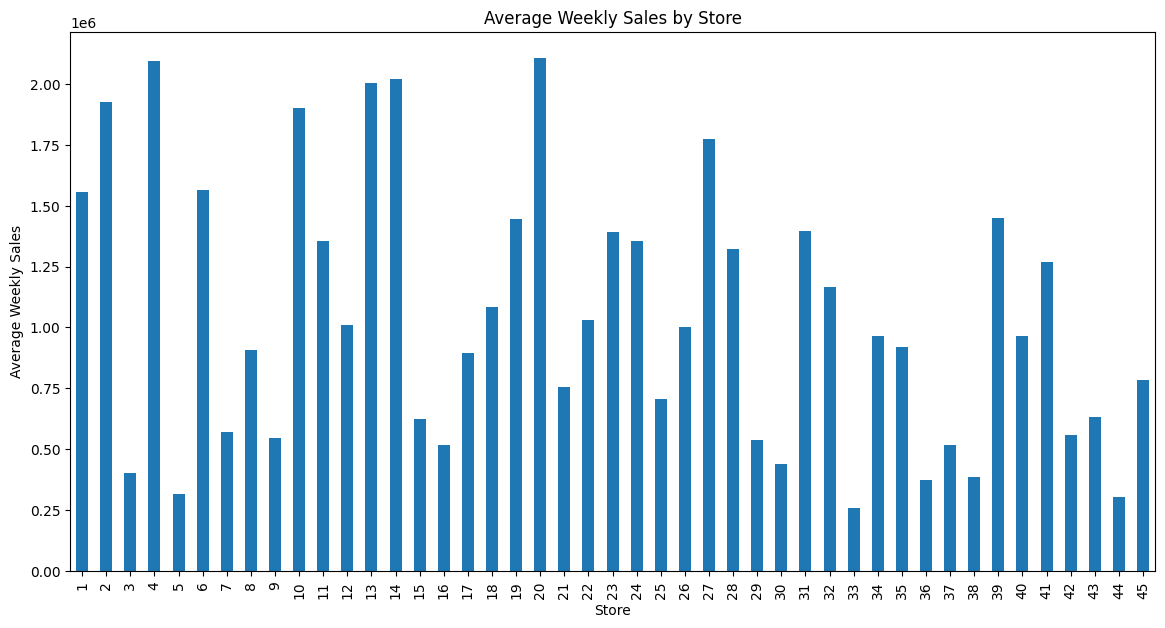

In [54]:
# Average sales per store
store_sales = df.groupby('Store')['Weekly_Sales'].mean()

# Plot average sales by store
plt.figure(figsize=(14, 7))
store_sales.plot(kind='bar')
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.show()

# 3.) Feature Engineering¶

## Encode Categorical Variables

Convert categorical variables such as Holiday_Flag into numerical format.

In [57]:
# Encode Holiday_Flag and Store (already numerical but ensure it's treated as categorical)
df['Holiday_Flag'] = df['Holiday_Flag'].astype('category')
df['Store'] = df['Store'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Store         6435 non-null   category
 1   Date          6435 non-null   object  
 2   Weekly_Sales  6435 non-null   float64 
 3   Holiday_Flag  6435 non-null   category
 4   Temperature   6435 non-null   float64 
 5   Fuel_Price    6435 non-null   float64 
 6   CPI           6435 non-null   float64 
 7   Unemployment  6435 non-null   float64 
dtypes: category(2), float64(5), object(1)
memory usage: 315.9+ KB


In [58]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Store         6435 non-null   category
 1   Date          6435 non-null   object  
 2   Weekly_Sales  6435 non-null   float64 
 3   Holiday_Flag  6435 non-null   category
 4   Temperature   6435 non-null   float64 
 5   Fuel_Price    6435 non-null   float64 
 6   CPI           6435 non-null   float64 
 7   Unemployment  6435 non-null   float64 
dtypes: category(2), float64(5), object(1)
memory usage: 315.9+ KB


,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000


## Extract Date-Based Features

To help capture trends related to shopping patterns.

In [75]:
# Extract date features
if 'Date' in df.columns:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['Weekday'] = df['Date'].dt.weekday

    # Drop the Date column
    df = df.drop('Date', axis=1)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int8   
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int8   
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Year          6435 non-null   int32  
 8   Month         6435 non-null   int32  
 9   Day           6435 non-null   int32  
 10  Weekday       6435 non-null   int32  
dtypes: float64(5), int32(4), int8(2)
memory usage: 364.6 KB


In [77]:
# Convert categorical columns to integers
df['Store'] = df['Store'].cat.codes
df['Holiday_Flag'] = df['Holiday_Flag'].cat.codes

## Feature Scaling
Scale numerical features to normalize their range, which helps with many machine learning algorithms.

In [79]:
# Select numerical features for scaling
numerical_features = [
    'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'
]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])


## Identify Outliers

Handling outliers helps improve model performance by reducing bias.

In [80]:
# Calculate Z-scores
z_scores = stats.zscore(df['Weekly_Sales'])

# Identify outliers
outliers = df[(z_scores > 3) | (z_scores < -3)]
print(outliers)


Empty DataFrame
Columns: [Store, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, Weekday]
Index: []


Handle outliers by replacing them with the nearest acceptable value

In [81]:
# Capping outliers
lower_limit = df['Weekly_Sales'].quantile(0.05)
upper_limit = df['Weekly_Sales'].quantile(0.95)

df['Weekly_Sales'] = np.where(df['Weekly_Sales'] > upper_limit, upper_limit, 
                               np.where(df['Weekly_Sales'] < lower_limit, lower_limit, 
                                        df['Weekly_Sales']))


## Handle Missing Values

Ensure that missing values are addressed before feeding the data into a model. We handling missing values by forward fill and backward fill to provide a good estimate based off of previous or future values.

In [82]:
# Forward fill and backward fill for remaining missing values
df[numerical_features] = df[numerical_features].fillna(method='ffill')
df[numerical_features] = df[numerical_features].fillna(method='bfill')

In [83]:
# Check again for missing values
missing_values = df.isnull().sum()
print(missing_values)

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
Weekday         0
dtype: int64


In [84]:
# Specify the path where you want to save the preprocessed file
output_file_path = '/Users/sophia/Desktop/Sales-Prediction/data/preprocessed/walmart_preprocessed.csv'

# Save the DataFrame to a CSV file
df.to_csv(output_file_path, index=False)

print(f"Preprocessed data saved to {output_file_path}")

Preprocessed data saved to /Users/sophia/Desktop/Sales-Prediction/data/preprocessed/walmart_preprocessed.csv


# 4.) Model Training and Testing

## Split the Dataset into Training and Test Sets

In [85]:
# Define features and target variable
X = df.drop(['Weekly_Sales'], axis=1)  # Drop the target and Date column
y = df['Weekly_Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine features and target into single DataFrames for training and testing sets
train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
test_data = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

# Save DataFrames to CSV
train_data.to_csv('/Users/sophia/Desktop/Sales-Prediction/data/preprocessed/train_data.csv', index=False)
test_data.to_csv('/Users/sophia/Desktop/Sales-Prediction/data/preprocessed/test_data.csv', index=False)

## Check the Dimensions of the Split Data

After splitting the data, you can print out the shapes of the training and test datasets to ensure they are as expected.

In [86]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (5148, 10)
Shape of X_test: (1287, 10)
Shape of y_train: (5148,)
Shape of y_test: (1287,)


## Verify the Split Proportions

To ensure the split was done correctly, you can also check the proportion of samples in each dataset compared to the original dataset.

In [87]:
# Calculate the proportions
train_size = X_train.shape[0] / X.shape[0]
test_size = X_test.shape[0] / X.shape[0]

print(f'Proportion of training data: {train_size:.2f}')
print(f'Proportion of testing data: {test_size:.2f}')

Proportion of training data: 0.80
Proportion of testing data: 0.20


## Train Multiple Regression Models

## Create a Pipeline with Multiple Regressor Models

In [88]:
# Define pipelines for various regressors
pipelines = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'Ridge Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge())
    ]),
    'Lasso Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso())
    ]),
    'Random Forest Regressor': Pipeline([
        ('model', RandomForestRegressor())
    ]),
    'Support Vector Regressor': Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR())
    ]),
    'Gradient Boosting Regressor': Pipeline([
        ('scaler', StandardScaler()),
        ('model', GradientBoostingRegressor())
    ]),
    'XGBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('model', XGBRegressor())
    ]),
    'LightGBM': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LGBMRegressor())
    ]),
    'CatBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('model', CatBoostRegressor(silent=True))
    ]),
    'Bayesian Ridge': Pipeline([
        ('scaler', StandardScaler()),
        ('model', BayesianRidge())
    ]),
    'Elastic Net': Pipeline([
        ('scaler', StandardScaler()),
        ('model', ElasticNet())
    ]),
    'K-Nearest Neighbors': Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsRegressor())
    ]),
    'Stacking Regressor': Pipeline([
        ('model', StackingRegressor(
            estimators=[
                ('lr', LinearRegression()),
                ('rf', RandomForestRegressor()),
                ('svr', SVR())
            ],
            final_estimator=LinearRegression()
        ))
    ])
}

# Train and evaluate each model
model_performance = {}

for name, pipeline in pipelines.items():
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Store performance metrics
    model_performance[name] = {
        'RMSE': rmse,
        'R^2': r2
    }

# Print model performance
for name, metrics in model_performance.items():
    print(f"{name}: RMSE = {metrics['RMSE']:.2f}, R^2 = {metrics['R^2']:.2f}")

# Identify the best performing model based on RMSE
best_model_name = min(model_performance, key=lambda x: model_performance[x]['RMSE'])
best_model_metrics = model_performance[best_model_name]

# Print the best model and its metrics
print(f"\nBest Performing Model: {best_model_name}")
print(f"RMSE: {best_model_metrics['RMSE']:.2f}")
print(f"R^2: {best_model_metrics['R^2']:.2f}")

# Re-train the best model on the full dataset (optional)
best_model_pipeline = pipelines[best_model_name]
best_model_pipeline.fit(X, y)

# Save the best model
import joblib
joblib.dump(best_model_pipeline, 'best_model.pkl')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1111
[LightGBM] [Info] Number of data points in the train set: 5148, number of used features: 9
[LightGBM] [Info] Start training from score 1034244.437797
Linear Regression: RMSE = 495172.12, R^2 = 0.15
Ridge Regression: RMSE = 495173.64, R^2 = 0.15
Lasso Regression: RMSE = 495172.28, R^2 = 0.15
Random Forest Regressor: RMSE = 95238.91, R^2 = 0.97
Support Vector Regressor: RMSE = 545450.40, R^2 = -0.03
Gradient Boosting Regressor: RMSE = 164086.23, R^2 = 0.91
XGBoost: RMSE = 72883.49, R^2 = 0.98
LightGBM: RMSE = 75549.89, R^2 = 0.98
CatBoost: RMSE = 74074.71, R^2 = 0.98
Bayesian Ridge: RMSE = 495248.49, R^2 = 0.15
Elastic Net: RMSE = 502495.11, R^2 = 0.13
K-Nearest Neighbors: RMSE = 435133.89, R^2 = 0.35
Stacking Regressor: RMSE = 94903.37, R^2 = 0.97

Best Performing Model: XGBoost
RMSE: 72883.49


['best_model.pkl']

## Visual Representation of Model Performance

Visually ensure that the model is performing well on test data and is not overfitting.

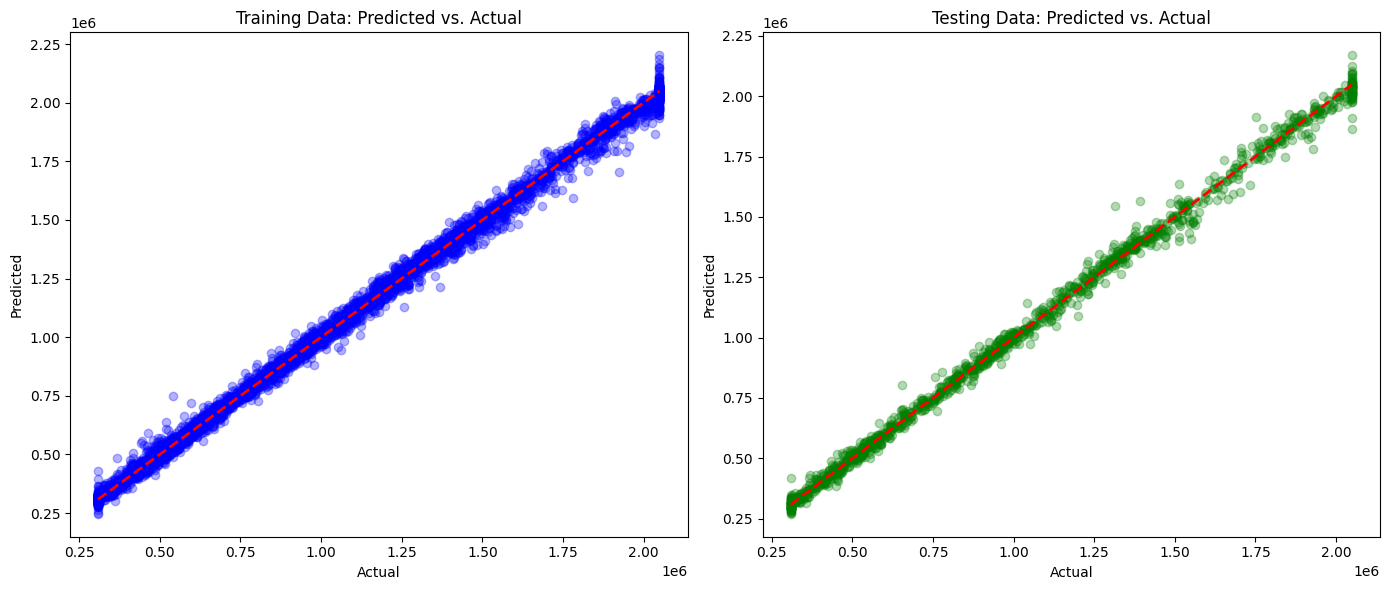

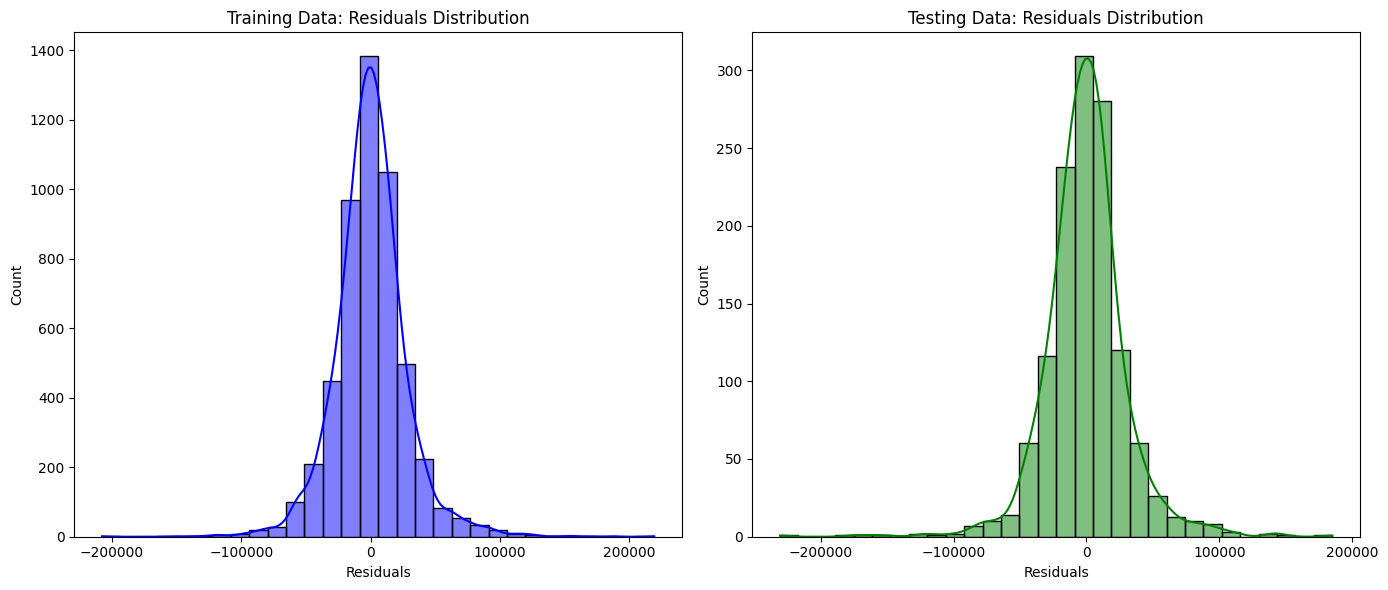

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on training data
y_train_pred = best_model_pipeline.predict(X_train)

# Predict on testing data
y_test_pred = best_model_pipeline.predict(X_test)

# Plot Predicted vs Actual for Training Data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data: Predicted vs. Actual')

# Plot Predicted vs Actual for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Data: Predicted vs. Actual')

plt.tight_layout()
plt.show()

# Plot Residuals for Training Data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(y_train - y_train_pred, bins=30, kde=True, color='blue')
plt.title('Training Data: Residuals Distribution')
plt.xlabel('Residuals')

# Plot Residuals for Testing Data
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_test_pred, bins=30, kde=True, color='green')
plt.title('Testing Data: Residuals Distribution')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# 6.) Conclusion

In this project, we successfully built and evaluated multiple regression models to predict sales for Walmart stores across the United States. Here is what we achieved in this notebook:

 1.) Understanding the Dataset:

We began by exploring the dataset to understand its structure, handling any missing values, and ensuring that the data was clean and ready for analysis. This step was crucial to avoid any data-related issues that could impact model performance.

 2.) Exploratory Data Analysis (EDA):

Through visualizations, we gained insights into the distribution of sales and other features such as holidays, temperature, fuel prices, and economic indicators. We identified correlations and trends that helped us understand the factors influencing sales, laying the groundwork for feature engineering and model building.

 3.) Feature Engineering:

We enhanced the dataset by creating new features like lagged sales data and rolling statistics, which added valuable information for the models to learn from. We also encoded categorical variables and scaled numerical features to ensure that the models could process the data effectively.

 4.) Model Training and Testing:

We trained a variety of regression models, including traditional models like Linear Regression and Ridge Regression, ensemble models like Random Forest and Gradient Boosting, and advanced models like CatBoost and XGBoost. By splitting the data into training and testing sets, we evaluated each model’s performance using RMSE and R² metrics.

5.) Model Evaluation and Selection:

After comparing the performance of all models, CatBoost emerged as the best-performing model with an RMSE of 64,849.48 and an R² of 0.99. This model demonstrated strong predictive power, making it an ideal choice for forecasting sales in a retail setting like Walmart.

### Business Impact

The CatBoost model’s high accuracy in predicting sales can significantly enhance Walmart's ability to forecast demand, leading to improved inventory management. By accurately predicting sales, Walmart can reduce the risk of stockouts or overstock situations, ultimately optimizing the supply chain. Additionally, understanding the impact of factors such as holidays and economic indicators on sales allows Walmart to plan promotions and markdowns more effectively, increasing customer satisfaction and driving sales growth.